Инфорация о датасете
__________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1289 non-null   object 
 1   ParsedOn            1289 non-null   object 
 2   Url                 1289 non-null   object 
 3   Name                1289 non-null   object 
 4   Price               1289 non-null   float64
 5   IssueYear           1289 non-null   int64  
 6   Generation          1289 non-null   object 
 7   Mileage             1077 non-null   float64
 8   Pts                 638 non-null    object 
 9   OwnersByPts         1077 non-null   float64
 10  State               1289 non-null   object 
 11  Modification        1289 non-null   object 
 12  Power               1288 non-null   float64
 13  EngineCapacity      1282 non-null   float64
 14  EngineTy

<Axes: xlabel='IssueYear'>

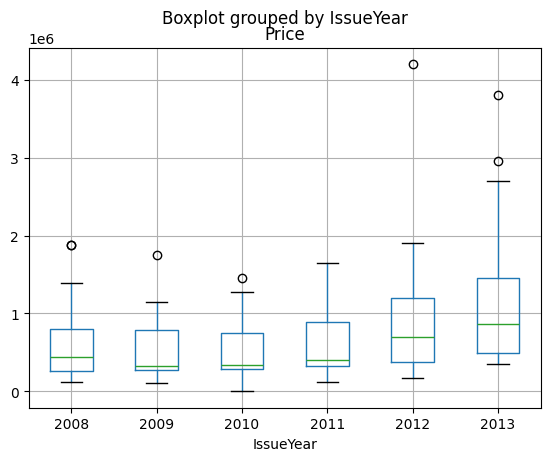

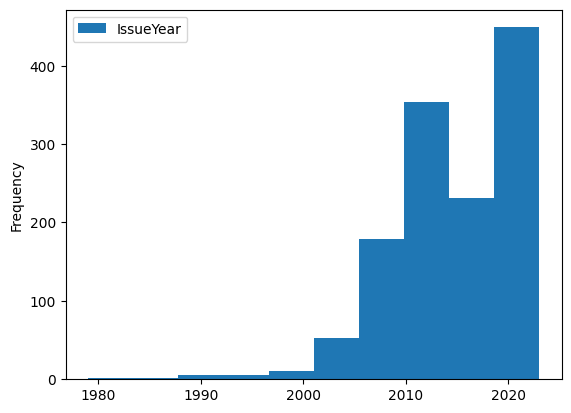

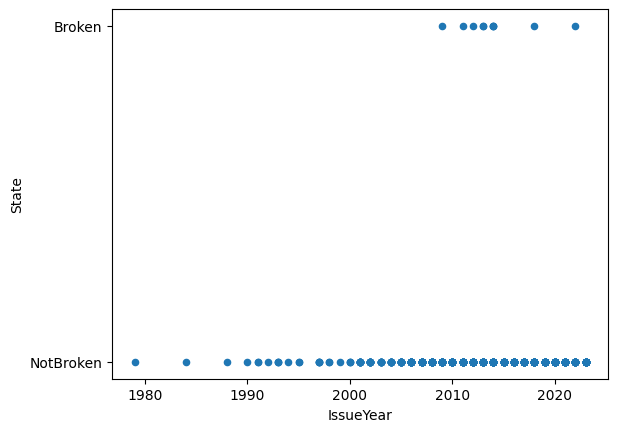

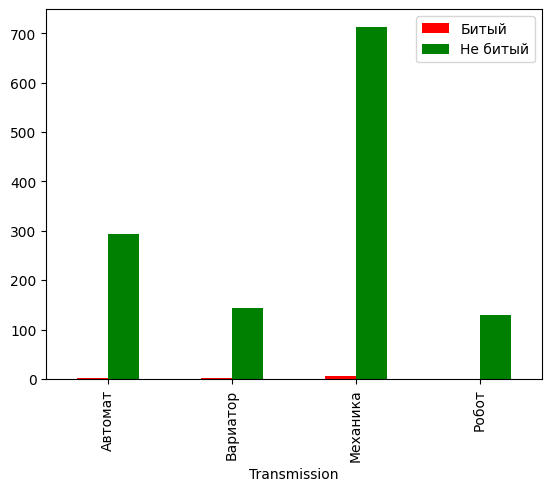

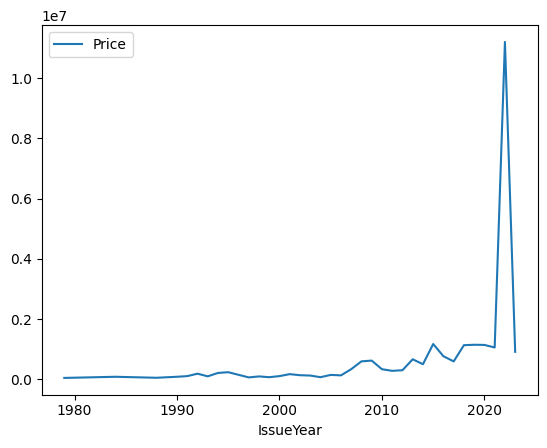

In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/ekrosz/Desktop/vehicles.csv", sep = ',', encoding = "windows-1251")

print("Инфорация о датасете")
print("__________________________________________________________________________")
df.info()

data = df.loc[0:5000, ["Name", "IssueYear", "Price", "SellerName"]]

print("Вывод значений по столбцу 'Name'")
print("__________________________________________________________________________")
print(data["Name"])
print("Вывод значений по строкам с 1 по 2")
print("__________________________________________________________________________")
print(data[0:2])

print("Вывод количества автомобилей сгруппированных по 'IssueYear'")
print("__________________________________________________________________________")
print(data.groupby(["IssueYear"]).size().reset_index(name="Count"))

print("Вывод отсортированного списка автомобилей по 'Price'")
print("__________________________________________________________________________")
print(data.sort_values(by = "Price"))

print("Вывод списка автомобилей без 'SellerName'")
print("__________________________________________________________________________")
print(data.drop(["SellerName"], axis=1))
print("Вывод списка автомобилей без первой строки")
print("__________________________________________________________________________")
print(data.drop([0], axis=0))

print("Вывод списка автомобилей без пустых значений в ячейках")
print("__________________________________________________________________________")
print(data.dropna(subset="SellerName"))
print("Вывод списка автомобилей с замененными пустыми значениями")
print("__________________________________________________________________________")
print(data["SellerName"].fillna(data["SellerName"].iloc[558]).sort_values())

df[data["IssueYear"].between(2008, 2013)].boxplot(column="Price", by="IssueYear")

df.plot.hist(column=["IssueYear"])

df.plot.scatter(x="IssueYear", y="State")

plot = df.groupby(["Transmission", "State"]).size().unstack().plot.bar(color=["red", "green"])
plot.legend(["Битый", "Не битый"])

df.drop_duplicates(["IssueYear"]).sort_values(by="IssueYear").plot.line(x="IssueYear", y="Price")